Accuracy :  0.6666666666666666
Classification Report :
               precision    recall  f1-score   support

           0       0.60      0.14      0.23        43
           1       0.67      0.95      0.79        80

    accuracy                           0.67       123
   macro avg       0.64      0.54      0.51       123
weighted avg       0.65      0.67      0.59       123



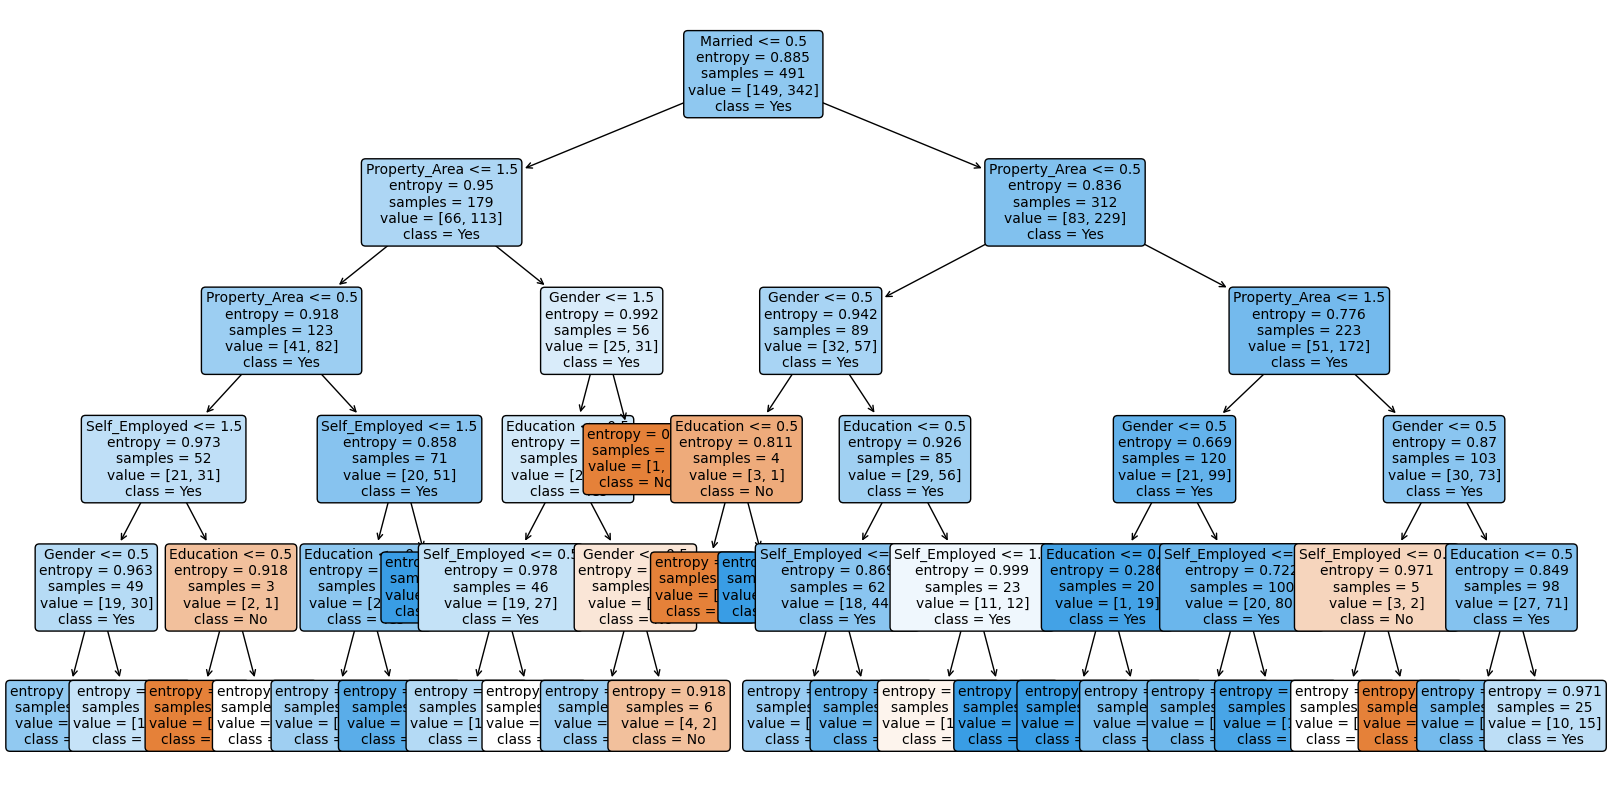

In [1]:
import pandas as pd
data = pd.read_csv('madfhantr.csv')
data.head()

# Drop Loan_ID
if 'Loan_ID' in data.columns :
  data = data.drop('Loan_ID', axis=1)

data.dtypes

if 'Dependents' in data.columns :
  data['Dependents'] = data['Dependents'].replace('3+', 3).astype(float)
  
import warnings
warnings.filterwarnings('ignore')

# Fill NaN by cols mean
numeric_cols = data.select_dtypes(include=['int64', 'float64'])
for col in numeric_cols:
  data[col] = data[col].fillna(data[col].mean(), inplace=True)
  
from sklearn.preprocessing import LabelEncoder

categorical_cols = data.select_dtypes(include = ['object'])
for col in categorical_cols : 
  data[col] = LabelEncoder().fit_transform(data[col])
  
X = data.drop('Loan_Status', axis = 1)
y = data['Loan_Status']


from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)
# max_depth is set to avoid overfitting
# If need all branches , remove max_depth
model = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)
model.fit(X_train, y_train)

#Evaluate the model
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)
print("Accuracy : ", accuracy_score(y_test, y_pred))
print("Classification Report :\n",classification_report(y_test, y_pred))

import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X.columns, class_names=['No', 'Yes'], filled=True, rounded=True, fontsize=10)
plt.show()        